In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# pip install koreanize-matplotlib

In [7]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


## 전국 부동산 실거래가 파일이 총 296개 있음.
## 파일 목록을 불러와 1개의 데이터 프레임으로 합쳐보세요.

In [10]:
# 파일 목록 불러오기
file_paths = glob("/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/*.csv")
print(file_paths)
print(len(file_paths))

['/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202112.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202111.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202110.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202109.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202108.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202107.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202106.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202105.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202104.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/202103.csv', '/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/

* 부동산 실거래가 파일만 불러와서 1개의 데이터 프레임으로 만들기
  * 반복문사용해서 파일 1개씩 불러오기
  * 빈 데이터 프레임을 만들어 합치기 concat
  

In [ ]:
# 전체 파일 목록중 마지막 8개는 부동산 실거래가 파일이 아니므로 슬라이싱으로 잘라옴
file_paths[:-2]

['1999_01.csv',
 '1999_02.csv',
 '1999_03.csv',
 '1999_04.csv',
 '1999_05.csv',
 '1999_06.csv',
 '1999_07.csv',
 '1999_08.csv',
 '1999_09.csv',
 '1999_10.csv',
 '1999_11.csv',
 '1999_12.csv',
 '2000_01.csv',
 '2000_02.csv',
 '2000_03.csv',
 '2000_04.csv',
 '2000_05.csv',
 '2000_06.csv',
 '2000_07.csv',
 '2000_08.csv',
 '2000_09.csv',
 '2000_10.csv',
 '2000_11.csv',
 '2000_12.csv',
 '2001_01.csv',
 '2001_02.csv',
 '2001_03.csv',
 '2001_04.csv',
 '2001_05.csv',
 '2001_06.csv',
 '2001_07.csv',
 '2001_08.csv',
 '2001_09.csv',
 '2001_10.csv',
 '2001_11.csv',
 '2001_12.csv',
 '2002_01.csv',
 '2002_02.csv',
 '2002_03.csv',
 '2002_04.csv',
 '2002_05.csv',
 '2002_06.csv',
 '2002_07.csv',
 '2002_08.csv',
 '2002_09.csv',
 '2002_10.csv',
 '2002_11.csv',
 '2002_12.csv',
 '2003_01.csv',
 '2003_02.csv',
 '2003_03.csv',
 '2003_04.csv',
 '2003_05.csv',
 '2003_06.csv',
 '2003_07.csv',
 '2003_08.csv',
 '2003_09.csv',
 '2003_10.csv',
 '2003_11.csv',
 '2003_12.csv',
 '2004_01.csv',
 '2004_02.csv',
 '2004_0

In [ ]:
pd.read_csv(f'C:/bigdata/data/전국부동산실거래가/2008_03.csv', skiprows=15, encoding='cp949')

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지
0,강원특별자치도 강릉시 견소동,202,202,0,송정한신,43.380,200803,1,"4,500",7,1997,경강로2539번길 8,NaN,,-,-
1,강원특별자치도 강릉시 견소동,202,202,0,송정한신,39.080,200803,5,"3,900",14,1997,경강로2539번길 8,NaN,,-,-
2,강원특별자치도 강릉시 견소동,202,202,0,송정한신,116.175,200803,25,"12,000",3,1997,경강로2539번길 8,NaN,,-,-
3,강원특별자치도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,200803,25,"13,400",7,2005,경강로2539번길 22,NaN,,-,-
4,강원특별자치도 강릉시 교동,1750,1750,0,교동1주공,59.890,200803,2,"8,450",5,1999,가작로 78,NaN,,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,200803,6,"8,800",2,2002,원호암5길 32,NaN,,-,-
67553,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,200803,7,"10,300",12,2002,원호암5길 32,NaN,,-,-
67554,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,200803,10,"9,800",11,2002,원호암5길 32,NaN,,-,-
67555,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,200803,10,"9,800",12,2002,원호암5길 32,NaN,,-,-


In [ ]:
# 반복문을 이용해 파일목록에서 이름을 가져와 데이터프레임으로 읽어오고
# concat을 이용해 빈 데이터 프레임에 합치기
data = pd.DataFrame()
for idx, file_name in enumerate(file_paths[:-2]):
    print(idx, end="\r")
    try:
      temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')
      data = pd.concat([data, temp])
    except Exception as e:
      print(e)
      temp = pd.read_csv(file_name, skiprows=15, encoding='utf-8')
      data = pd.concat([data, temp])





<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')
<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence


<ipython-input-18-dc372d760a82>:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='utf-8')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name, skiprows=15, encoding='cp949')


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


<ipython-input-18-dc372d760a82>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp])


'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence


In [ ]:
data.to_csv("/content/drive/MyDrive/Classroom/Colab Notebooks/data/전국부동산실거래가/199901_202408Apartment_price.csv")

In [ ]:
data.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지
0,강원특별자치도 양구군 양구읍 상리,510,510,0,경림,59.400,200509,23,"5,000",11,1998,양록길23번길 11,NaN,,-,-
0,경기도 의정부시 민락동,756-7,756,7,한라비발디,84.990,200510,30,"12,750",19,2003,오목로 73,NaN,,-,-
1,경기도 의정부시 신곡동,456,456,0,신일1,59.878,200510,20,"5,750",3,1997,시민로245번길 10,NaN,,-,-
2,경기도 의정부시 신곡동,727-1,727,1,풍림,49.830,200510,20,"5,500",8,1998,회룡로 245,NaN,,-,-
0,경기도 의정부시 용현동,46,46,0,용현현대1차,129.730,200511,21,"12,200",11,1992,오목로 36,NaN,,-,-


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9591343 entries, 0 to 30915
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   번지        object 
 2   본번        object 
 3   부번        object 
 4   단지명       object 
 5   전용면적(㎡)   float64
 6   계약년월      object 
 7   계약일       object 
 8   거래금액(만원)  object 
 9   층         object 
 10  건축년도      object 
 11  도로명       object 
 12  해제사유발생일   float64
 13  등기신청일자    object 
 14  거래유형      object 
 15  중개사소재지    object 
dtypes: float64(2), object(14)
memory usage: 1.2+ GB


In [ ]:
data = data

In [ ]:
data.reset_index(drop=True, inplace=True)

## 데이터 타입 맞추기, 결측값 처리하기, 삭제할 컬럼 선정하기
* astype(int, float, str)
* dropna(), fillna(), isna().sum(),
* drop('컬럼명', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591343 entries, 0 to 9591342
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   번지        object 
 2   본번        object 
 3   부번        object 
 4   단지명       object 
 5   전용면적(㎡)   float64
 6   계약년월      object 
 7   계약일       object 
 8   거래금액(만원)  object 
 9   층         object 
 10  건축년도      object 
 11  도로명       object 
 12  해제사유발생일   float64
 13  등기신청일자    object 
 14  거래유형      object 
 15  중개사소재지    object 
dtypes: float64(2), object(14)
memory usage: 1.1+ GB


In [ ]:
data.head(1)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지
0,강원특별자치도 양구군 양구읍 상리,510,510,0,경림,59.4,200509,23,"5,000",11,1998,양록길23번길 11,NaN,,-,-


In [ ]:
# data['거래금액(만원)'].astype(int)

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(",", "")

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591343 entries, 0 to 9591342
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   번지        object 
 2   본번        object 
 3   부번        object 
 4   단지명       object 
 5   전용면적(㎡)   float64
 6   계약년월      object 
 7   계약일       object 
 8   거래금액(만원)  int32  
 9   층         object 
 10  건축년도      object 
 11  도로명       object 
 12  해제사유발생일   float64
 13  등기신청일자    object 
 14  거래유형      object 
 15  중개사소재지    object 
dtypes: float64(2), int32(1), object(13)
memory usage: 1.1+ GB


In [ ]:
data.isna().sum()

시군구               0
번지              258
본번               76
부번               76
단지명               0
전용면적(㎡)           0
계약년월              0
계약일               0
거래금액(만원)          0
층                 0
건축년도            115
도로명               0
해제사유발생일     9497436
등기신청일자            0
거래유형              0
중개사소재지            0
dtype: int64

In [ ]:
data.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지'],
      dtype='object')

In [ ]:
data = data.drop(['번지', '본번', '부번', '계약일', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지'], axis=1)

In [ ]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.400,200509,5000,11,1998
1,경기도 의정부시 민락동,한라비발디,84.990,200510,12750,19,2003
2,경기도 의정부시 신곡동,신일1,59.878,200510,5750,3,1997
3,경기도 의정부시 신곡동,풍림,49.830,200510,5500,8,1998
4,경기도 의정부시 용현동,용현현대1차,129.730,200511,12200,11,1992


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591343 entries, 0 to 9591342
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   단지명       object 
 2   전용면적(㎡)   float64
 3   계약년월      object 
 4   거래금액(만원)  int32  
 5   층         object 
 6   건축년도      object 
dtypes: float64(1), int32(1), object(5)
memory usage: 475.6+ MB


In [ ]:
data.isna().sum()

시군구           0
단지명           0
전용면적(㎡)       0
계약년월          0
거래금액(만원)      0
층             0
건축년도        115
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

시군구         0
단지명         0
전용면적(㎡)     0
계약년월        0
거래금액(만원)    0
층           0
건축년도        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9591228 entries, 0 to 9591342
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   단지명       object 
 2   전용면적(㎡)   float64
 3   계약년월      object 
 4   거래금액(만원)  int32  
 5   층         object 
 6   건축년도      object 
dtypes: float64(1), int32(1), object(5)
memory usage: 548.8+ MB


In [ ]:
data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.400,200509,5000,11,1998
1,경기도 의정부시 민락동,한라비발디,84.990,200510,12750,19,2003
2,경기도 의정부시 신곡동,신일1,59.878,200510,5750,3,1997
3,경기도 의정부시 신곡동,풍림,49.830,200510,5500,8,1998
4,경기도 의정부시 용현동,용현현대1차,129.730,200511,12200,11,1992
...,...,...,...,...,...,...,...
9591338,충청북도 충주시 호암동,호반현대,84.960,202308,15700,2,1994.0
9591339,충청북도 충주시 호암동,호암리버빌(2단지),84.680,202308,20700,3,2002.0
9591340,충청북도 충주시 호암동,호암힐데스하임,84.950,202308,40200,11,2019.0
9591341,충청북도 충주시 호암동,호암힐데스하임,99.870,202308,50000,13,2019.0


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data['건축년도'] = data['건축년도'].astype(int)

In [ ]:
data['층'].unique()

array([11, 19, 3, 8, 17, 1, 2, 5, 4, 6, 14, 7, 13, 9, 16, 12, 10, 15, 23,
       21, 18, 24, 20, 22, 26, 25, 27, 29, 30, 35, 36, 28, 31, 34, 51, 37,
       41, 49, 46, -1, 32, 48, 45, 47, 40, 63, 43, 38, 33, 44, 42, 58, 54,
       39, 55, 0, 57, 65, 50, 62, 66, 68, -2, 53, 59, 56, 52, 60, 67, -3,
       64, -4, 61, 70, 69, 75, 76, 74, 73, 72, 79, 78, 80, 77, 71, 83, 81,
       82], dtype=object)

In [ ]:
data[data['층'] == -4]

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
3397370,서울특별시 은평구 진관동,우물골2단지두산위브(223~244동)BL2-7,134.46,201201,62600,-4,2010
3436509,서울특별시 은평구 진관동,우물골2단지두산위브(223~244동)BL2-7,134.46,201202,62600,-4,2010
3436510,서울특별시 은평구 진관동,우물골2단지두산위브(223~244동)BL2-7,134.46,201202,65050,-4,2010
4816022,서울특별시 은평구 진관동,우물골2단지두산위브(223~244동)BL2-7,134.46,201503,55567,-4,2010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591228 entries, 0 to 9591227
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   단지명       object 
 2   전용면적(㎡)   float64
 3   계약년월      object 
 4   거래금액(만원)  int32  
 5   층         object 
 6   건축년도      int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 439.1+ MB


In [ ]:
data['층']= data['층'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591228 entries, 0 to 9591227
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시군구       object 
 1   단지명       object 
 2   전용면적(㎡)   float64
 3   계약년월      object 
 4   거래금액(만원)  int32  
 5   층         int32  
 6   건축년도      int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 402.5+ MB


In [ ]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.400,200509,5000,11,1998
1,경기도 의정부시 민락동,한라비발디,84.990,200510,12750,19,2003
2,경기도 의정부시 신곡동,신일1,59.878,200510,5750,3,1997
3,경기도 의정부시 신곡동,풍림,49.830,200510,5500,8,1998
4,경기도 의정부시 용현동,용현현대1차,129.730,200511,12200,11,1992


In [ ]:
del data['시군구2']

In [ ]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.400,200509,5000,11,1998
1,경기도 의정부시 민락동,한라비발디,84.990,200510,12750,19,2003
2,경기도 의정부시 신곡동,신일1,59.878,200510,5750,3,1997
3,경기도 의정부시 신곡동,풍림,49.830,200510,5500,8,1998
4,경기도 의정부시 용현동,용현현대1차,129.730,200511,12200,11,1992


In [ ]:
data.to_csv("./data/부동산실거래가2008-2023.csv", index=False)

In [ ]:
data['단지명'].nunique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['시군구'] = le.fit_transform(data['시군구'])
print(le.classes_)


['강원특별자치도 강릉시 강동면 안인리' '강원특별자치도 강릉시 견소동' '강원특별자치도 강릉시 교동' ...
 '충청북도 충주시 칠금동' '충청북도 충주시 풍동' '충청북도 충주시 호암동']


In [ ]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,75,경림,59.400,200509,5000,11,1998
1,666,한라비발디,84.990,200510,12750,19,2003
2,668,신일1,59.878,200510,5750,3,1997
3,668,풍림,49.830,200510,5500,8,1998
4,669,용현현대1차,129.730,200511,12200,11,1992


In [ ]:
le.inverse_transform([668])

array(['경기도 의정부시 신곡동'], dtype=object)

In [ ]:
data.info()

In [ ]:
le.classes_

In [ ]:
temp

In [ ]:
data['시군구'][3]

In [ ]:
le.inverse_transform(data['시군구'][3:4])

In [ ]:
le2 = LabelEncoder()
data['단지명'] = le2.fit_transform(data['단지명'])
print(le2.classes_)

['(1-10)' '(1-102)' '(1028-0)' ... '힐하우스' '힐하우스(577-79)' '힐하우스(802-3)']


In [ ]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
0,75,2104,59.400,200509,5000,11,1998
1,666,30939,84.990,200510,12750,19,2003
2,668,19400,59.878,200510,5750,3,1997
3,668,30208,49.830,200510,5500,8,1998
4,669,22739,129.730,200511,12200,11,1992


In [ ]:
data = data.rename(columns= {'전용면적(㎡)' : '전용면적'})

In [ ]:
data.tail()

,시군구,단지명,전용면적,계약년월,거래금액(만원),층,건축년도
9591223,3653,33054,84.96,202308,15700,2,1994
9591224,3653,33105,84.68,202308,20700,3,2002
9591225,3653,33110,84.95,202308,40200,11,2019
9591226,3653,33110,99.87,202308,50000,13,2019
9591227,3653,33110,99.80,202308,46000,3,2019


In [ ]:
X = data.drop('거래금액(만원)', axis=1)
y = data['거래금액(만원)']

<Axes: >

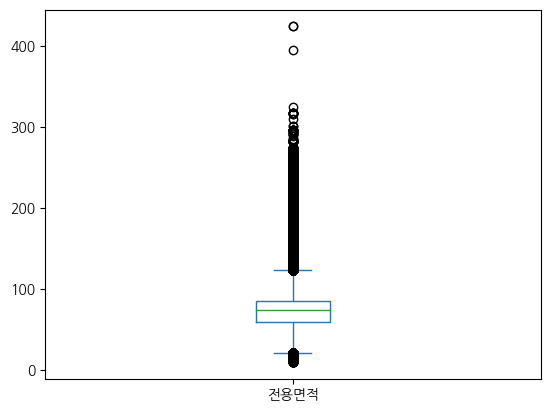

In [ ]:
data['전용면적'].plot(kind='box')

<Axes: >

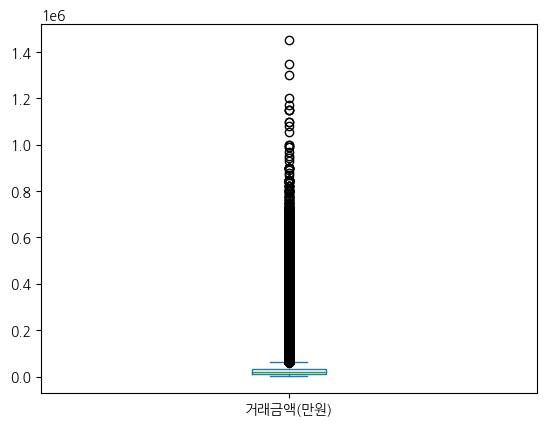

In [ ]:
data['거래금액(만원)'].plot(kind='box')

In [ ]:
for i in data.columns:
    data[i].plot(kind='box')

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X = rc.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [ ]:
X.head()

,시군구,단지명,전용면적,계약년월,층,건축년도
0,-0.977248,-0.972467,-0.575108,-1.101996,0.333333,-0.166667
1,-0.649279,0.745948,0.431184,-1.100887,1.222222,0.250000
2,-0.648169,0.058284,-0.556311,-1.100887,-0.555556,-0.250000
3,-0.648169,0.702384,-0.951435,-1.100887,0.000000,-0.166667
4,-0.647614,0.257271,2.190523,-1.099778,0.333333,-0.666667


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591228 entries, 0 to 9591227
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   시군구     float64
 1   단지명     float64
 2   전용면적    float64
 3   계약년월    float64
 4   층       float64
 5   건축년도    float64
dtypes: float64(6)
memory usage: 439.1 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_valid)
# print(accuracy_score(y_valid, pred))
print(mean_squared_error(y_valid, pred))
print(r2_score(y_valid, pred))


455732140.8871859
0.31166284851187886


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_valid)
# print(accuracy_score(y_valid, pred))
print(mean_squared_error(y_valid, pred))
print(r2_score(y_valid, pred))

22049326.950754303
0.9666967291884082


In [ ]:
print(type(y_valid))

<class 'pandas.core.series.Series'>


In [ ]:
y_valid.shape

(1918246,)

In [ ]:
print(type(pred))

<class 'numpy.ndarray'>


In [ ]:
pred.shape

(1918246,)

In [ ]:
pred_s = pd.Series(pred, name='pred')

In [ ]:
pred_s

0          31800.0
1          25000.0
2          32500.0
3          11000.0
4          21000.0
            ...   
1918241    37500.0
1918242     4400.0
1918243    40700.0
1918244    31000.0
1918245    26800.0
Name: pred, Length: 1918246, dtype: float64

In [ ]:
pred_s.index

RangeIndex(start=0, stop=1918246, step=1)

In [ ]:
y_valid_s = y_valid.reset_index(drop=True)

In [ ]:
y_valid_s

0          31500
1          24900
2          31500
3          12300
4          21200
           ...  
1918241    40000
1918242     5000
1918243    38500
1918244    31800
1918245    27200
Name: 거래금액(만원), Length: 1918246, dtype: int32

In [ ]:
pd.DataFrame([y_valid_s, pred_s])

,0,1,2,3,4,5,6,7,8,9,...,1918236,1918237,1918238,1918239,1918240,1918241,1918242,1918243,1918244,1918245
거래금액(만원),31500.0,24900.0,31500.0,12300.0,21200.0,5650.0,21000.0,14800.0,30790.0,10700.0,...,10700.0,12500.0,343000.0,47500.0,15250.0,40000.0,5000.0,38500.0,31800.0,27200.0
pred,31800.0,25000.0,32500.0,11000.0,21000.0,5000.0,23800.0,13000.0,24900.0,10750.0,...,8000.0,12300.0,310000.0,45625.0,15200.0,37500.0,4400.0,40700.0,31000.0,26800.0


In [ ]:
pd.DataFrame([dtr.feature_importances_, X.columns])

,0,1,2,3,4,5
0,0.42183,0.032627,0.282773,0.139614,0.011416,0.111739
1,시군구,단지명,전용면적,계약년월,층,건축년도


In [ ]:
pwd

'C:\\bigdata'

In [ ]:
# 변수/모델에 저장되어 있는 데이터를 파일로 만들어 주는 라이브러리
import joblib
joblib.dump(dtr, './apart_model2.model')

['./apart_model2.model']

In [ ]:
pd.DataFrame(y_valid, pred)

,거래금액(만원)
31600.0,NaN
25000.0,NaN
32500.0,26000.0
11000.0,5700.0
21000.0,NaN
...,...
37500.0,NaN
4400.0,NaN
40700.0,NaN
31000.0,24100.0


In [ ]:
pred2 = dtr.predict(X_test)
print(mean_squared_error(y_test, pred2))
print(r2_score(y_test, pred2))